In [45]:
import matplotlib.pyplot as plt
import numpy as np
import random
from matplotlib.ticker import AutoMinorLocator

In [2]:
def cuadratica(x):
    return x**2

In [3]:
xv= np.linspace(-6,6,50)


In [4]:
def derivada(f,x,h=0.001):
    return (f(x+h)- f(x))/h

In [5]:
x= random.uniform(-6,6)
epocas=400
learning_rate= 0.01
for epoca in range(epocas):
    #calcular gradiente en el punto actual
    gradiente= derivada(cuadratica,x,0.0001)
    
    #dar un paso pequeño en la direccion contraria al gradiente
    x= x - gradiente*learning_rate
    #print(epoca,x)


In [6]:
theta= [random.uniform(-1,1), random.uniform(-1,1)]
print(theta)


[-0.9299915030748356, -0.35768273865707045]


In [7]:
x=range(-25,25)
y=[20*xv+5 for xv in x]

In [8]:
def mse(x, y,theta):
    m,b =theta
    residuos = [(y_i-(m*x_i+b))**(2) for x_i, y_i in zip(x,y)]
    mse= sum(residuos)/ len(residuos)
    return mse

In [9]:
def limite_de_cuociente(x,y,f,v,i,h=0.0001):
    #agregar el diferencial h solo al i esimo elemento de v
    w= [v_j + (h if j==i else 0) for j,v_j in enumerate(v)]
    return (f(x,y,w)- f(x,y,v))/h


In [10]:
def estimate_gradient(x,y,f,v,h=0.0001):
    return [limite_de_cuociente(x,y,f,v,i,h) for i in range(len(v))]

In [11]:
def paso_en_gradiente(v, gradient, step_size):
    step= [step_size*g_i for g_i in gradient]
    return [a+b for a,b in zip(v,step)]

In [12]:
epocas= 60000
for epoca in range(epocas):
    grad= estimate_gradient(x,y,mse, theta,h=0.001)
    theta= paso_en_gradiente(theta,grad, -0.0001)
    #print(epoca,theta)

In [18]:
def gradiente_mse(x, y, theta):
    pendiente, intercepto = theta
    y_pred = [pendiente * xv + intercepto for xv in x]

    # Derivada parcial respecto a la pendiente
    g1 = 2 / len(x) * sum([ (y_p - y_d) * x_d for x_d, y_d, y_p in zip(x, y, y_pred) ])

    # Derivada parcial respecto al intercepto
    g2 = 2 / len(x) * sum([ (y_p - y_d) for x_d, y_d, y_p in zip(x, y, y_pred) ])
    return [g1, g2]

In [19]:
x= range(-50,50)
y= [20*xv +5 for xv in x]

In [24]:
theta= [random.uniform(-1,1),random.uniform(-1,1)]
learning_rate= 0.001
epocas=5000
for epoca in range(epocas):
    #calcular el gradiente
    grad= gradiente_mse(x,y,theta)
    #dar un paso en la direccion contraria al gradiente
    theta= paso_en_gradiente(theta, grad, -learning_rate)
    #print(epoca,theta)

In [41]:
# Generamos datos con tendencia lineal
x = 2 * np.random.rand(100)
# pendiente = 3
# intercepto = 4
y = 4 + 3 * x + np.random.rand(100)

## batch gradient descent

In [42]:
# comenzar con valores aleatorios para la pendiente
# y el intercepto
theta = [random.uniform(-1,1), random.uniform(-1,1)]
learning_rate = 0.001
n_iter_max = 100_000
gtol = 1e-6 # tolerancia en la norma del vector gradiente
# Gradient descent
iterar = True
n_iter = 0
while iterar:
    # Calcular el gradiente
    grad = gradiente_mse(x, y, theta)
    # Realizar un paso en la dirección contraria
    # al gradiente
    theta = paso_en_gradiente(theta, grad, -learning_rate)
    # Check 1: ver si se alcanzó el número máximo de iteraciones
    if n_iter > n_iter_max:
        iterar = False
    # Check 2: revisar si la norma del gradiente ya alcanzó el
    # mínimo tamaño permitido por el criterio de tolerancia
    norm_grad = sum([g**2 for g in grad])**(1/2)
    if norm_grad < gtol:
        iterar = False
    # Contabilizar la iteracion
    n_iter += 1
print("Solucion: ", theta)
print("Num iteraciones: ", n_iter)

Solucion:  [2.9840062794946802, 4.553276111248797]
Num iteraciones:  42705


In [43]:
# Calcular el coeficiente de determinación R-squared
# Suma total de cuadrados: variacion total de y_i's respecto a su promedio
y_prom = np.mean(y)
suma_total_cuadrados = sum([v**2 for v in y - y_prom])
# Suma de errores cuadráticos
suma_sqerrors = sum([ (theta[0] * xv + theta[1] - yv)**2 for xv,yv in zip(x,y) ])
# calculo de r-squared
r_squared = 1 - suma_sqerrors / suma_total_cuadrados
print("R-squared: ", r_squared)


R-squared:  0.9737097211990168


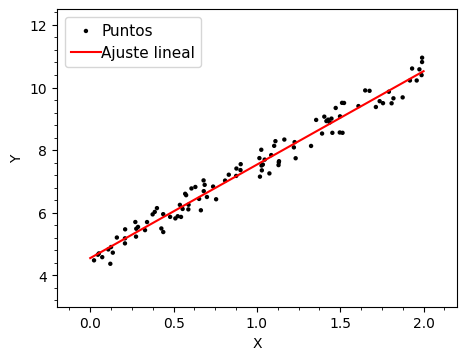

In [47]:
fig=plt.figure(1,figsize=(5,3.5),dpi=100)
fig.subplots_adjust(left=0.15,bottom=0.12,right=0.95,top=0.97,hspace=0.24,wspace=0.20)
ax1=fig.add_subplot(111)
ax1.set_xlabel("X")
ax1.set_ylabel("Y")
ax1.set_xlim(-0.2,2.2)
ax1.set_ylim(3.0,12.5)
ax1.scatter(x,y,marker=".",fc="black",ec="none",s=40,label="Puntos")
xv=np.linspace(0,2,100)
ax1.plot(xv,xv*theta[0]+theta[1],color="red",label="Ajuste lineal")
ax1.xaxis.set_minor_locator(AutoMinorLocator(4))
ax1.yaxis.set_minor_locator(AutoMinorLocator(5))
ax1.legend(loc=2,scatterpoints=1,handletextpad=0.001,fontsize=11)
plt.show()

## descenso de gradiente estocástico

In [48]:
# Generamos datos con tendencia lineal
x = 2 * np.random.rand(100)
# pendiente = 3
# intercepto = 4
y = 4 + 3 * x + np.random.rand(100)

In [49]:
n_epocas = 50
t0, t1 = 5, 50 # hiperparámetros de la learning schedule
def learning_schedule(t):
    return t0 / (t + t1)
theta = np.random.rand(2) # parámetros iniciales aleatorios
# El número de puntos
m = len(x)
thetas = []
for epoca in range(n_epocas):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = x[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        grad = gradiente_mse(x, y, theta)
        
        learning_rate = learning_schedule(epoca * m + i)
        theta = paso_en_gradiente(theta, grad, -learning_rate)
        thetas.append(theta)
print(theta)

[2.993672034448407, 4.5208732905432]


## descenso de gradiente mini-batch

In [52]:
n_epocas = 1000
batch_size = 10
t0, t1 = 5, 50 # hiperparámetros de la learning schedule
def learning_schedule(t):
    return t0 / (t + t1)
theta = np.random.rand(2) # parametros iniciales aleatorios
# Numero de puntos
m = len(x)
thetas = []
for epoca in range(n_epocas):
    i_mb = np.random.randint(0, m, batch_size)
    xi = x[i_mb]
    yi = y[i_mb]
    grad = gradiente_mse(xi, yi, theta)
    learning_rate = learning_schedule(epoca)
    theta = paso_en_gradiente(theta, grad, -learning_rate)
    thetas.append(theta)
print(theta)

[3.006041328801355, 4.507940726791148]
